In [91]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

from mle_toolbox import load_result_logs
import matplotlib.pyplot as plt

meta_log, hyper_log = load_result_logs("/Users/rtl/Desktop")
# search_vars = ['inner_lrate', 'lambda_l1', 'outer_grad_on_test', 'outer_lrate', 'sparsity']
# eval_metrics = ['l1_norm_core', 'frob_norm_core', 'core_fit_loss', 'outer_loss', 'mean_inner_loss']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Embrace the functionality of the `HyperLog` & `MetaLog`

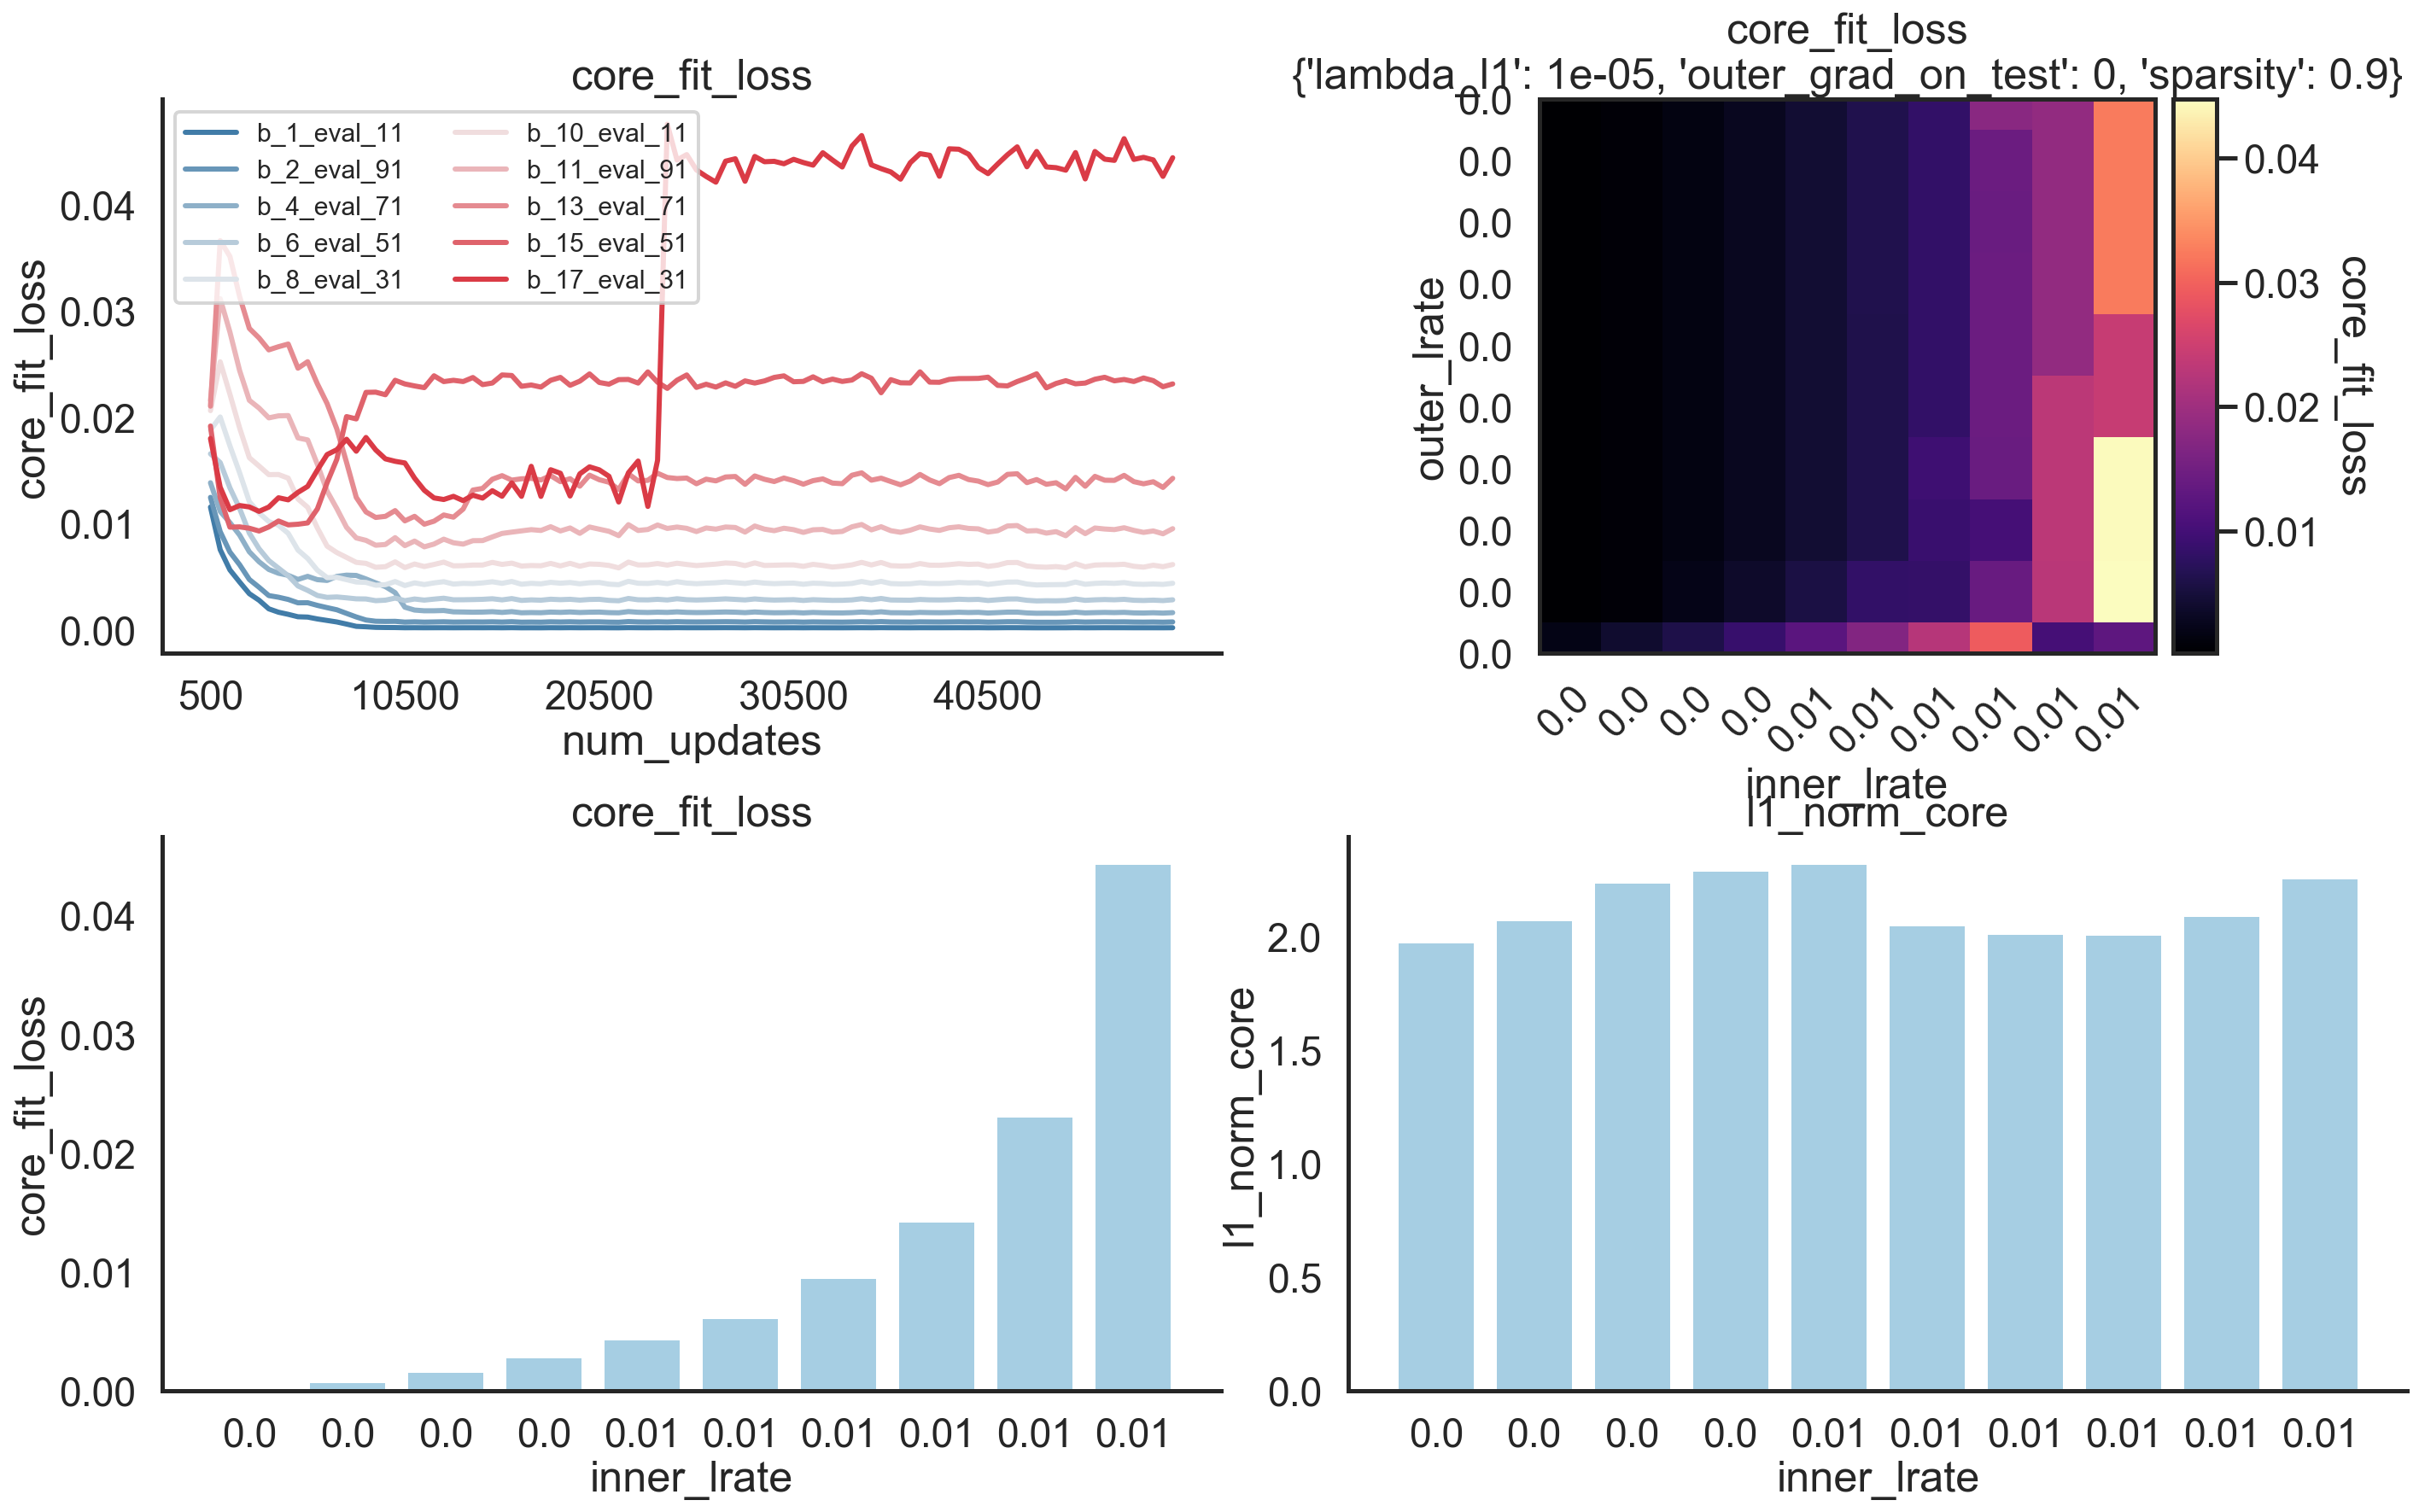

In [120]:
fixed_params = {'lambda_l1': 1e-05,
                'outer_grad_on_test': 0,
                'outer_lrate': 3.4e-04,
                'sparsity': 0.9}
sub_hyper = hyper_log.filter(fixed_params)
sub_ids = sub_hyper.eval_ids
sub_meta = meta_log.filter(sub_ids)

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
sub_meta.plot('core_fit_loss', fig=fig, ax=axs.flatten()[0])
hyper_log.plot_2D_heat(var_names=['inner_lrate', 'outer_lrate'], metric_name="core_fit_loss",
                       fixed_params={'lambda_l1': 1e-05,
                                     'outer_grad_on_test': 0,
                                     'sparsity': 0.9},
                       fig=fig, ax=axs.flatten()[1])
sub_hyper.plot_1D_bar('inner_lrate', 'core_fit_loss', fig=fig, ax=axs.flatten()[2])
hyper_log.plot_1D_bar('inner_lrate', 'l1_norm_core', fixed_params, fig=fig, ax=axs.flatten()[3])

# Setup basic z-test (normal) on learning curves
- Treat each timestep as independent sample (wrong since correlated?)

## Next things
- [ ] return intermediate results to inspect
- [ ] add option threshold for alpha vs p
- [ ] Single time step vs t test when variables are assumed to be indep.

In [121]:
from mle_toolbox.hypothesis import HypothesisTester

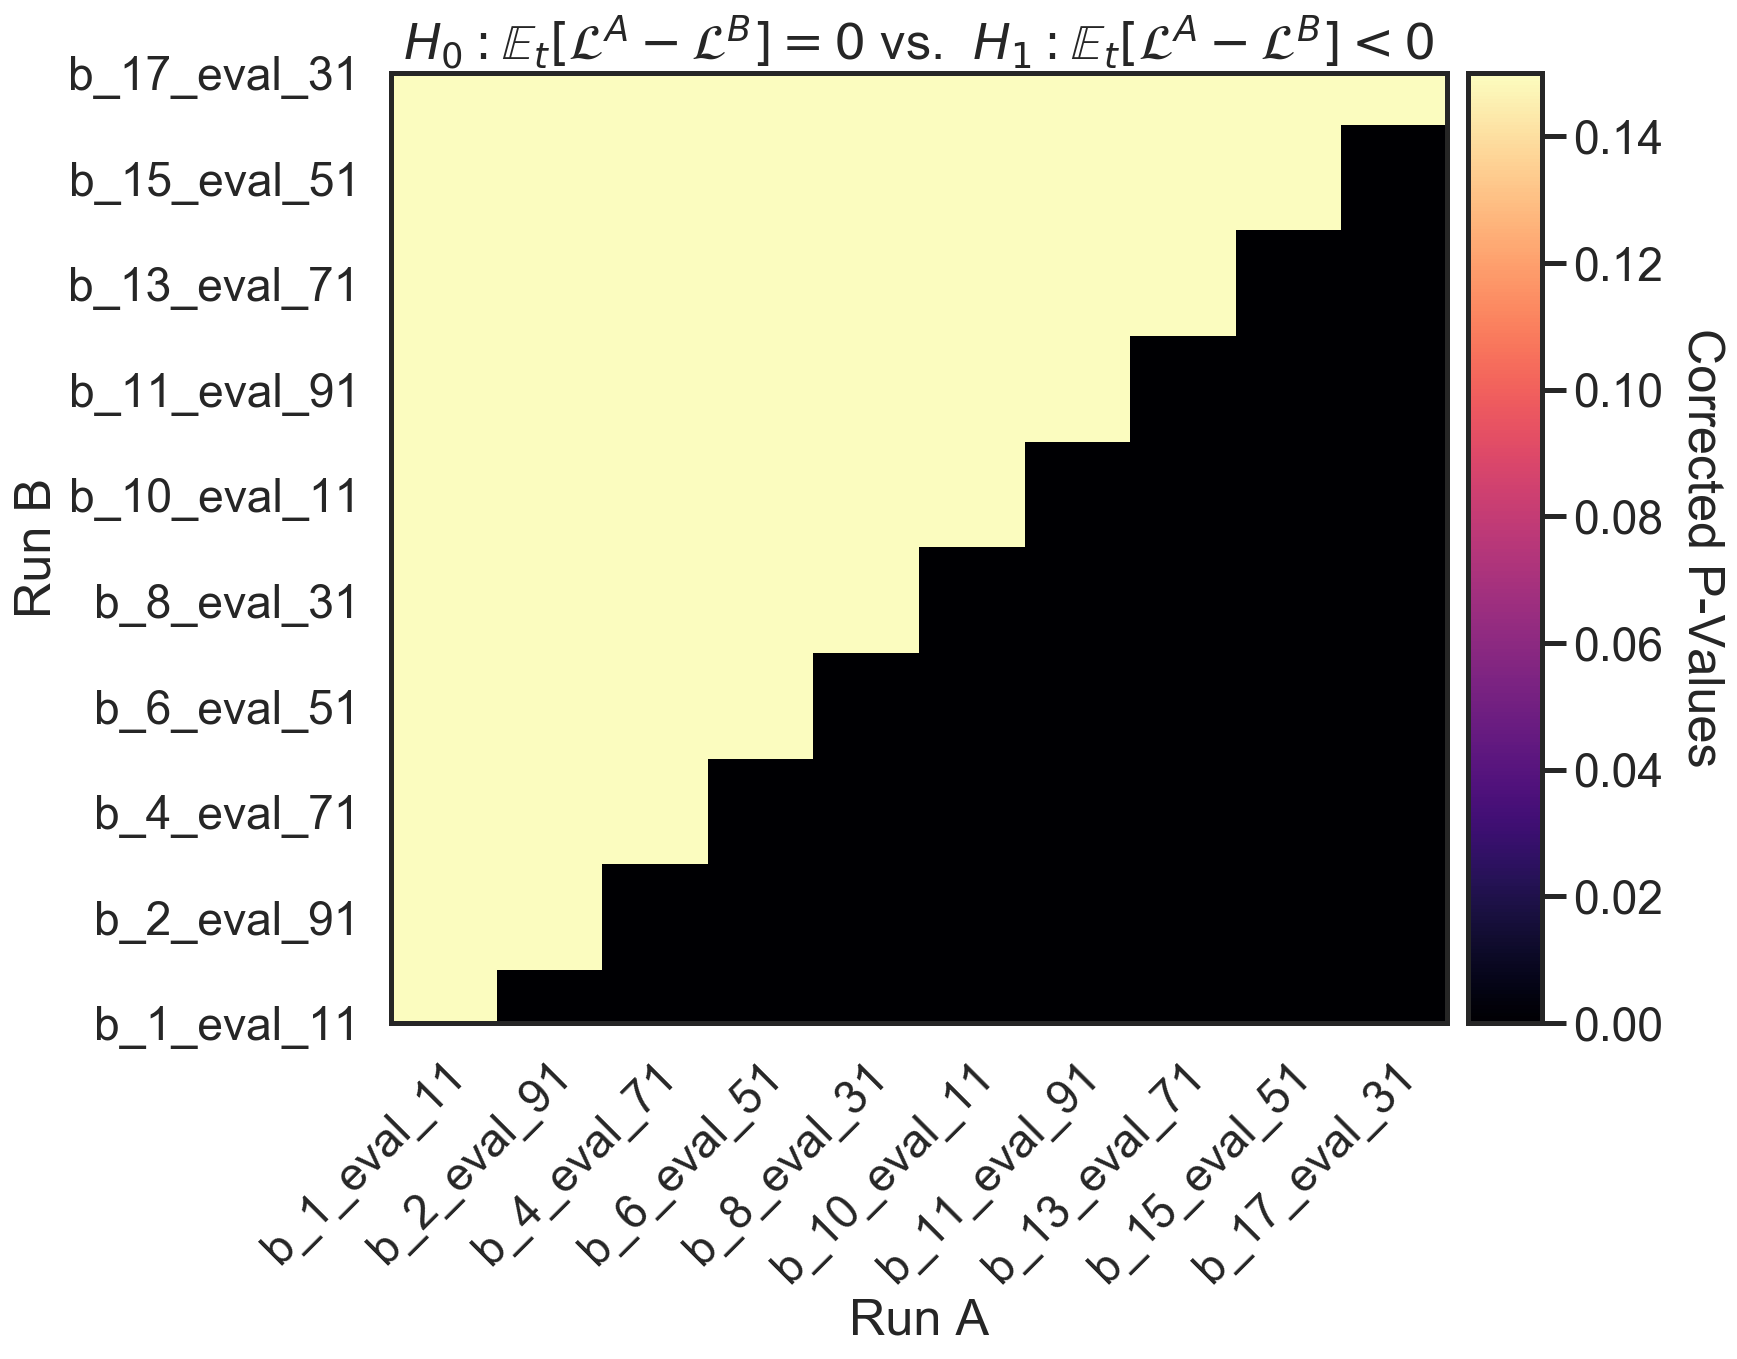

In [124]:
hypo_tester = HypothesisTester(sub_meta)
hypo_tester.run_pairwise('core_fit_loss')
hypo_tester.run_corrections()
hypo_tester.plot(corrected=True, method="bonferroni")